#### Librerias

In [1]:
import re
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

#### Opciones

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 500)
plt.style.use("ggplot")

#### Variables

In [3]:
DATA_PATH: Path = Path("../data")

#### Cargar datos

In [4]:
df: pd.DataFrame = pd.read_parquet(path=DATA_PATH / "data.parquet.gzip", engine="fastparquet")
print(f"Filas: {df.shape[0]:,}, Columnas: {df.shape[1]:,}")
df.head()

Filas: 100,000, Columnas: 57


,warranty,sub_status,condition,deal_ids,base_price,seller_id,listing_type_id,price,buying_mode,parent_item_id,category_id,descriptions,last_updated,id,official_store_id,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,initial_quantity,start_time,permalink,sold_quantity,available_quantity,state.name,n_pictures,tags__dragged_bids_and_visits,tags__dragged_visits,tags__free_relist,tags__good_quality_thumbnail,tags__poor_quality_thumbnail,shipping__local_pick_up,shipping__tags,shipping__free_shipping,shipping__mode,non_mercado_pago_payment_methods__acordar_con_el_comprador,non_mercado_pago_payment_methods__american_express,non_mercado_pago_payment_methods__cheque_certificado,non_mercado_pago_payment_methods__contra_reembolso,non_mercado_pago_payment_methods__diners,non_mercado_pago_payment_methods__efectivo,non_mercado_pago_payment_methods__giro_postal,non_mercado_pago_payment_methods__mastercard,non_mercado_pago_payment_methods__mastercard_maestro,non_mercado_pago_payment_methods__mercadopago,non_mercado_pago_payment_methods__tarjeta_de_crédito,non_mercado_pago_payment_methods__transferencia_bancaria,non_mercado_pago_payment_methods__visa,non_mercado_pago_payment_methods__visa_electron
0,None,NaN,new,None,80.0,8208882349,bronze,80.0,buy_it_now,MLA6553902747,MLA126406,MLA4695330653-912855983,2015-09-05 20:42:58+00:00,MLA4695330653,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05 20:42:53+00:00,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04 20:42:53,active,None,NaN,1,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,Capital Federal,2,1,0,0,0,0,True,None,False,not_specified,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,NUESTRA REPUTACION,NaN,used,None,2650.0,8141699488,silver,2650.0,buy_it_now,MLA7727150374,MLA10267,MLA7160447179-930764806,2015-09-26 18:08:34+00:00,MLA7160447179,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26 18:08:30+00:00,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25 18:08:30,active,None,NaN,1,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,Capital Federal,6,0,0,0,0,0,True,None,False,me2,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,None,NaN,used,None,60.0,8386096505,bronze,60.0,buy_it_now,MLA6561247998,MLA1227,MLA7367189936-916478256,2015-09-09 23:57:10+00:00,MLA7367189936,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09 23:57:07+00:00,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-08 23:57:07,active,None,NaN,1,2015-09-09 23:57:07,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,Capital Federal,1,1,0,0,0,0,True,None,False,me2,0,0,0,0,0,1,0,0,0,0,1,1,0,0
3,None,NaN,new,None,580.0,5377752182,silver,580.0,buy_it_now,None,MLA86345,MLA9191625553-932309698,2015-10-05 16:03:50.306000+00:00,MLA9191625553,NaN,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28 18:47:56+00:00,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,2015-12-04 01:13:16,active,None,NaN,1,2015-09-28 18:47:56,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,Capital Federal,2,0,0,0,0,0,True,None,False,me2,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,MI REPUTACION.,NaN,used,None,30.0,2938071313,bronze,30.0,buy_it_now,MLA3133256685,MLA41287,MLA7787961817-902981678,2015-08-28 13:37:41+00:00,MLA7787961817,NaN,True,NaN,ARS,http://mla-s2-p.mlstatic.com/13595-MLA77879618...,Serenata - Jennifer Blake,False,2015-08-24 22:07:20+00:00,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,2015-10-23 22:07:20,active,None,NaN,1,2015-08-24 22:07:20,http://articulo.mercadolibre.com.ar/MLA7787961...,0,1,Buenos Aires,2,1,0,0,0,0,True,None,False,not_specified,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [5]:
dtype_lists = {dtype: df.select_dtypes(include=dtype).columns.tolist() for dtype in df.dtypes.unique()}
for dtype, variables in dtype_lists.items():
    print(f"{dtype}: {variables}")

object: ['warranty', 'deal_ids', 'parent_item_id', 'category_id', 'descriptions', 'id', 'thumbnail', 'title', 'secure_thumbnail', 'video_id', 'permalink', 'shipping__tags', 'shipping__mode']
category: ['sub_status', 'condition', 'listing_type_id', 'buying_mode', 'currency_id', 'status', 'state.name']
category: ['sub_status', 'condition', 'listing_type_id', 'buying_mode', 'currency_id', 'status', 'state.name']
float64: ['base_price', 'price', 'official_store_id', 'original_price', 'catalog_product_id']
int64: ['seller_id', 'initial_quantity', 'sold_quantity', 'available_quantity', 'n_pictures', 'tags__dragged_bids_and_visits', 'tags__dragged_visits', 'tags__free_relist', 'tags__good_quality_thumbnail', 'tags__poor_quality_thumbnail', 'non_mercado_pago_payment_methods__acordar_con_el_comprador', 'non_mercado_pago_payment_methods__american_express', 'non_mercado_pago_payment_methods__cheque_certificado', 'non_mercado_pago_payment_methods__contra_reembolso', 'non_mercado_pago_payment_metho

## Analisis Univariado

In [6]:
def plot_categorical_dist(
    df: pd.DataFrame, column: str, title: str = "", xlabel: str = "Porcentaje (%)", ylabel: str = "", figsize: tuple = (4, 4)
) -> None:
    """
    Crea un gráfico de barras para una variable categórica.

    Args:
        df: DataFrame con los datos.
        column: Nombre de la columna categórica.
        title: Título del gráfico (opcional).
        xlabel: Etiqueta del eje X (opcional).
        ylabel: Etiqueta del eje Y (opcional).

    """
    ax = (
        df[column]
        .value_counts(normalize=True, dropna=False)
        .sort_values()
        .mul(100)
        .round(2)
        .plot(kind="barh", xlabel=xlabel, ylabel=ylabel or column, title=title or f"Distribución de {column}", figsize=figsize)
    )

    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f%%", label_type="edge", padding=2)

    plt.tight_layout()
    plt.show()

In [7]:
def create_wordcloud(df: pd.DataFrame, column_name: str) -> None:
    """
    Crea una nube de palabras para la columna seleccionada.

    Args:
        df (pd.DataFrame): El dataframe que contiene la columna.
        column_name (str): La columna a la que se le quiere realizar la nube de palabras.
    """
    text = " ".join(df[column_name].dropna().astype(str))
    text = re.sub(r"[^\w\s]", "", text.lower())
    word_freq = Counter(text.split())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

#### Label (Condicion)

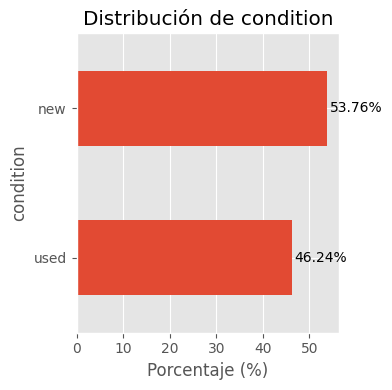

In [8]:
plot_categorical_dist(df=df, column="condition")

- Estamos frente a un problema de clasificacion ligeramente desbalanceado. La clase `Usada` representa alrededor del 46.24% de los datos, mientras que la clase `Nueva` representa alrededor del 53.76% de los datos.

#### Categoricas

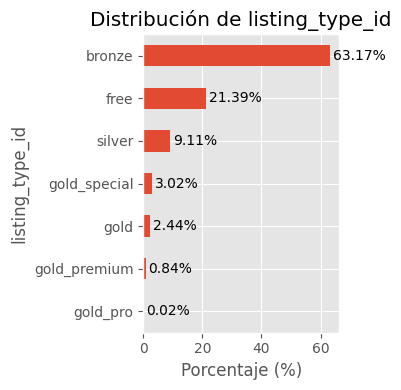

In [9]:
plot_categorical_dist(df=df, column="listing_type_id")

- Los publicaciones de tipo `Bronce` representan al 63.17% de los datos, seguido de las publicaciones gratuitas con un 21.39%. El restante se divide entre las publicacines `Silver` y `Gold`.

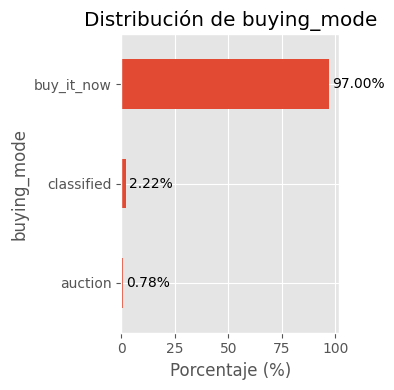

In [10]:
plot_categorical_dist(df=df, column="buying_mode")

- El 97% de los datos tiene la categoria de `Compralo Ahora`, 0.78% son de `Subasta` y el restante 2.2% pertenecen a `Clasificados`.
- No es claro a que corresponde la categoria de `Clasificados`.

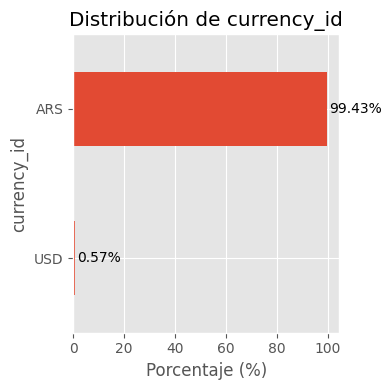

In [11]:
plot_categorical_dist(df=df, column="currency_id")

- El 99.5% de los datos esta listado en `Pesos Argentinos`, y el 0.05% restante esta listando en `Dolares`

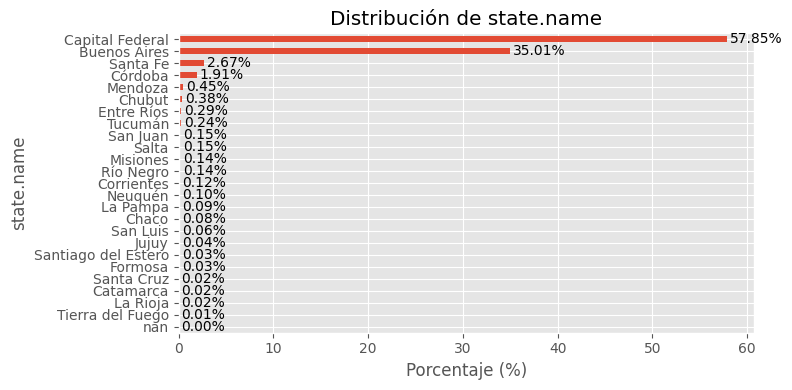

In [12]:
plot_categorical_dist(df=df, column="state.name", figsize=(8, 4))

- El 57.85% son publicaciones donde la direccion del vendedor corresponde a `CABA`. El 35.01 son publicaciones donde la direccion del vendedor corresponde a la `Provincia de Buenos Aires`. El restante se lo reparten entre las demas provincias y un pequeño numero de publicaciones con valores faltantes. 

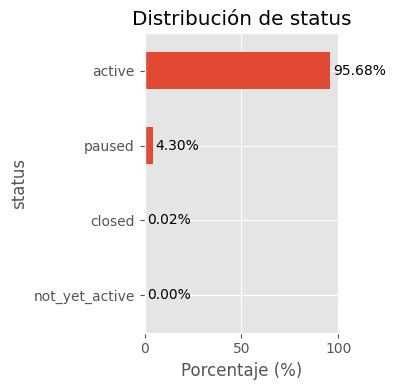

In [13]:
plot_categorical_dist(df=df, column="status")

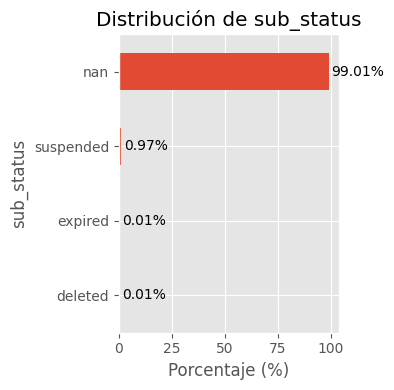

In [14]:
plot_categorical_dist(df=df, column="sub_status")

In [15]:
df[["status", "sub_status"]].value_counts(dropna=False).to_frame()

count
status         sub_status       
active         NaN         95675
paused         NaN          3338
               suspended     966
closed         expired        13
               deleted         7
not_yet_active NaN             1

#### Booleanos

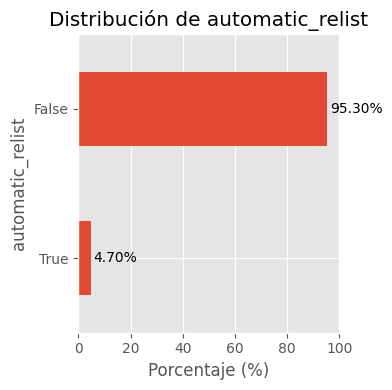

In [16]:
plot_categorical_dist(df=df, column="automatic_relist")

- Solo el 4.7% de las publicaciones tienen `automatic relist`. Sin embargo, no es claro que significa esta caracteristica.

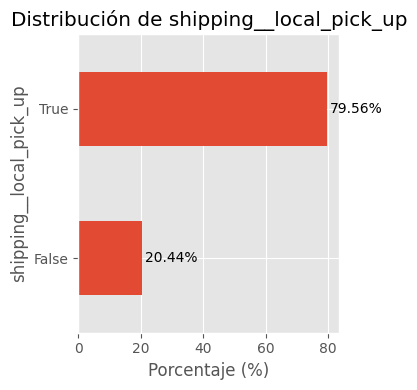

In [17]:
plot_categorical_dist(df=df, column="shipping__local_pick_up")

- El 79.56% de las publicaciones ofrecen `Recogida en tienda`

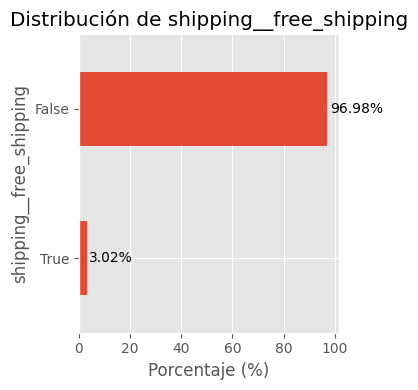

In [18]:
plot_categorical_dist(df=df, column="shipping__free_shipping")

- El 3.02% de las publicaciones ofrecen `Envio gratis`

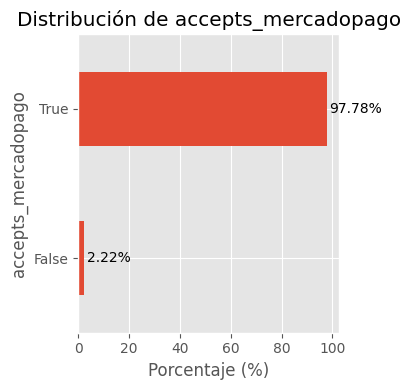

In [19]:
plot_categorical_dist(df=df, column="accepts_mercadopago")

- El 97.78% de las publicaciones aceptan `MercadoPago` como medio de pago. A continuacion se realiza el mismo analisis pero para medios de pagos diferentes a `MercadoPago`:

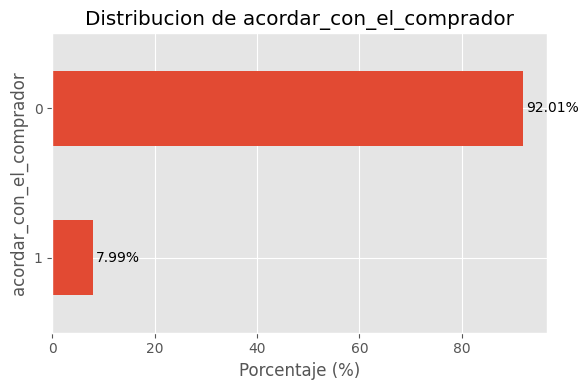

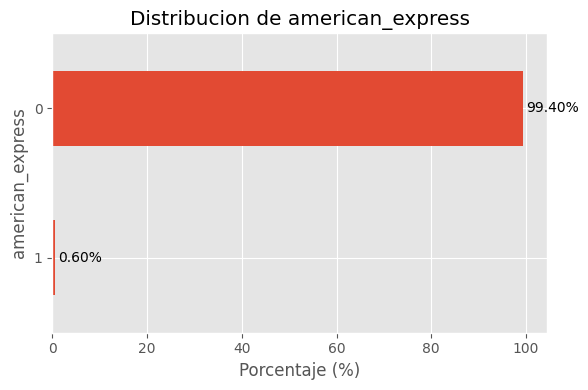

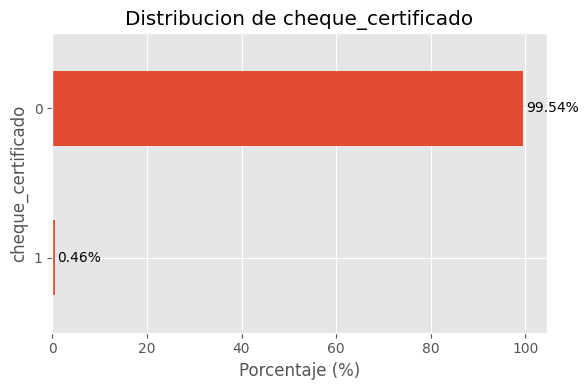

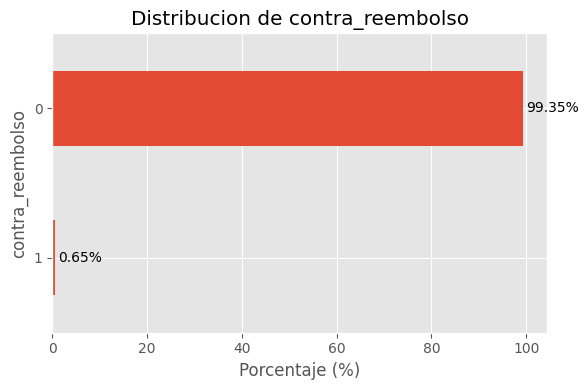

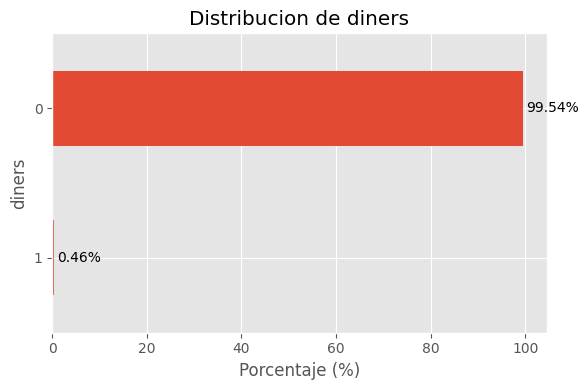

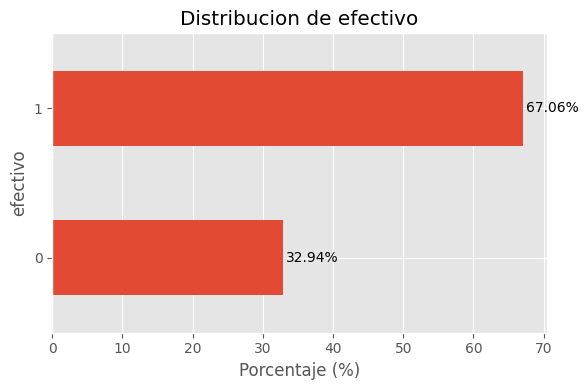

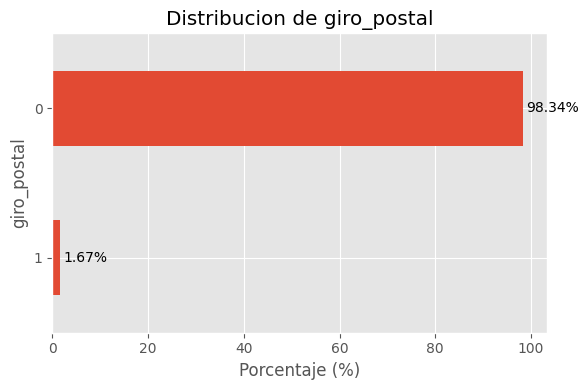

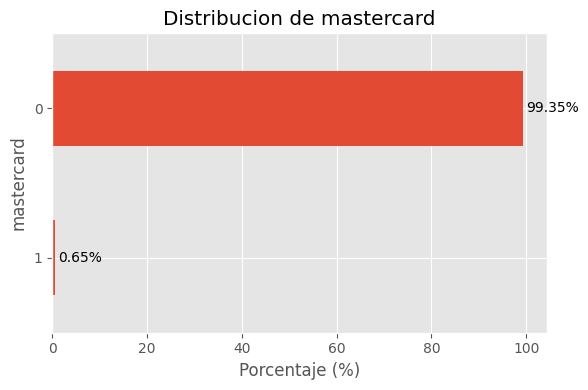

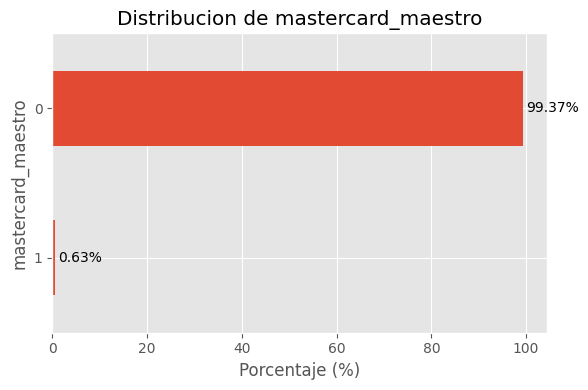

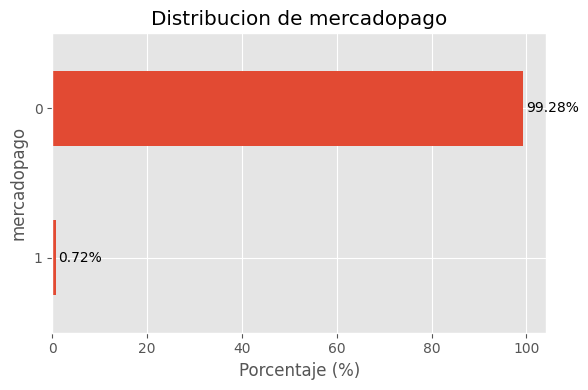

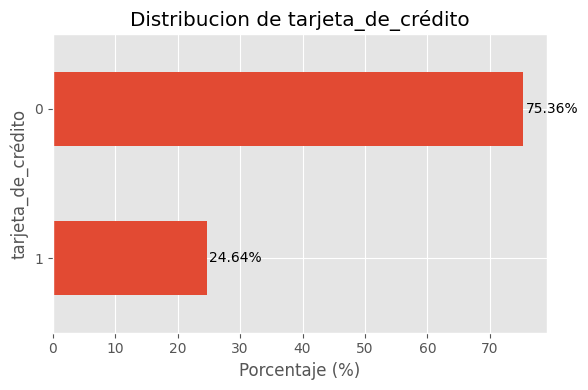

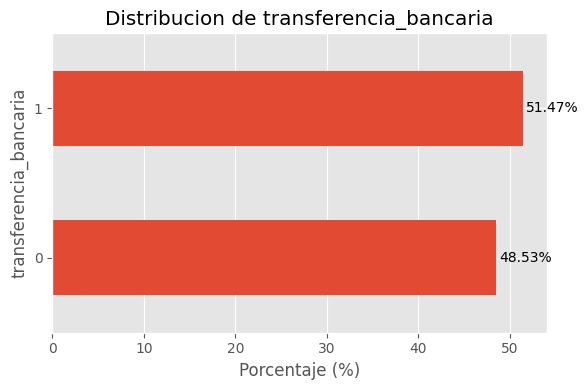

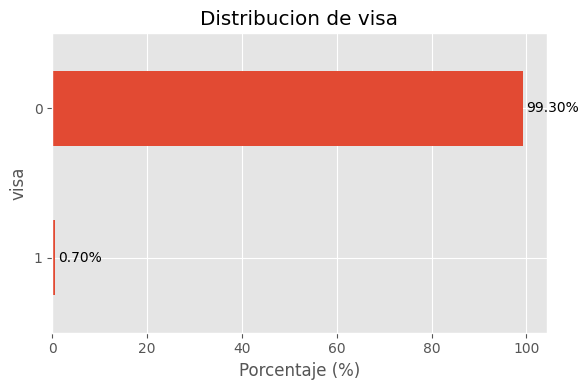

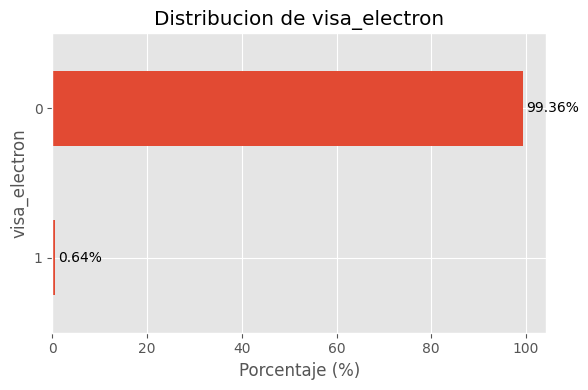

In [20]:
for col in [c for c in df.columns if c.startswith("non_mercado_pago_payment_method")]:
    plot_categorical_dist(
        df=df,
        column=col,
        ylabel=col.replace("non_mercado_pago_payment_methods__", ""),
        title=f"Distribucion de {col.replace('non_mercado_pago_payment_methods__', '')}",
        figsize=(6, 4),
    )

- De los medios de pago diferentes a `MercadoPago`, los mas aceptados son:
    - `Acuerdo con Comprador` (7.99%)
    - `Tarjeta de Credito` (24.64%)
    - `Transferencia Bancaria` (51.47%)
    - `Efectivo` (67.06%)
- Hay otra variable que tambien tiene informacion de `MercadoPago` -> `non_mercado_pago_payment_methods__mercadopago`

In [21]:
df[["accepts_mercadopago", "non_mercado_pago_payment_methods__mercadopago"]].value_counts(dropna=False).to_frame()

,,count
accepts_mercadopago,non_mercado_pago_payment_methods__mercadopago,
True,0,97061
False,0,2219
True,1,720


- Parecen no coincidir, entonces se procedera a eliminar `non_mercado_pago_payment_methods__mercadopago`

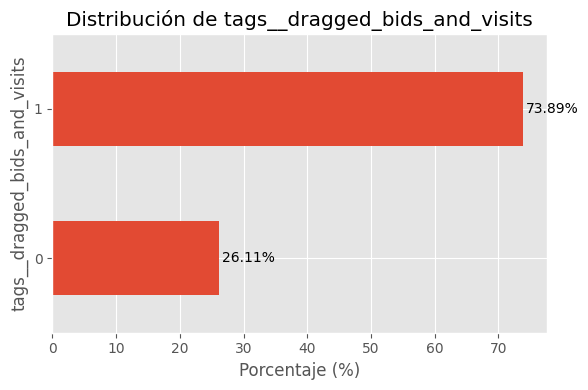

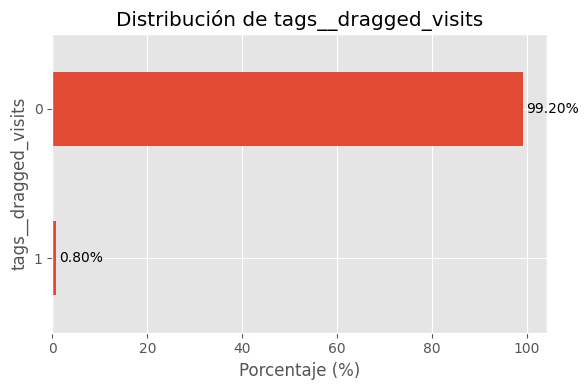

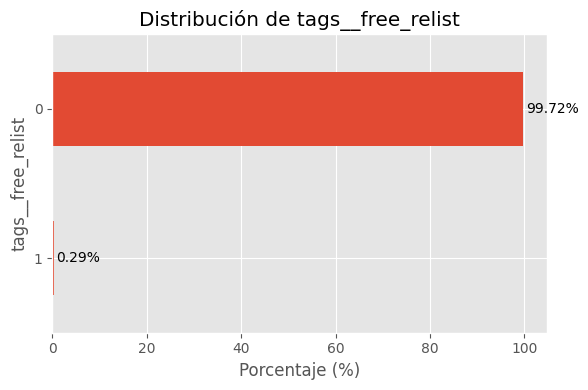

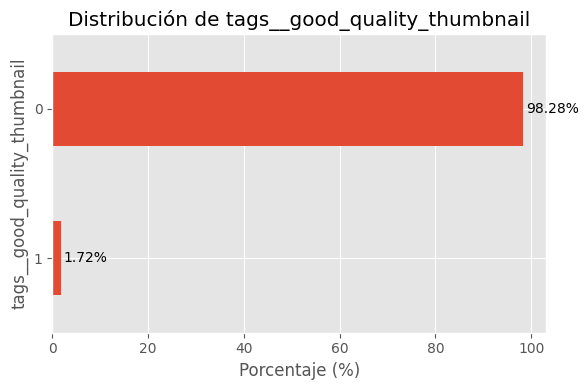

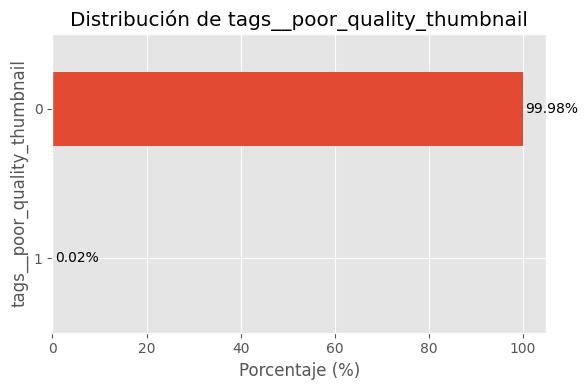

In [22]:
for col in [c for c in df.columns if c.startswith("tags")]:
    plot_categorical_dist(df=df, column=col, figsize=(6, 4))

- Finalmente, tenemos las variables de los tags de las publicaciones. Una proporcion muy poca de las publicaciones tiene estos tags. El tag mas completo es `dragged_bits_and_visits`, presente en el 73.89% de los datos.

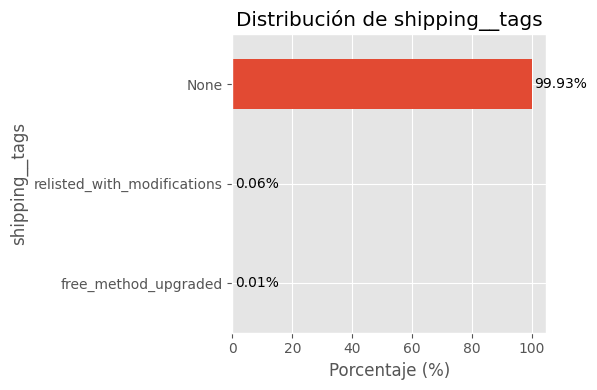

In [23]:
plot_categorical_dist(df=df, column="shipping__tags", figsize=(6, 4))

- Hay muy pocas publicaciones con shipping tags (0.07%)

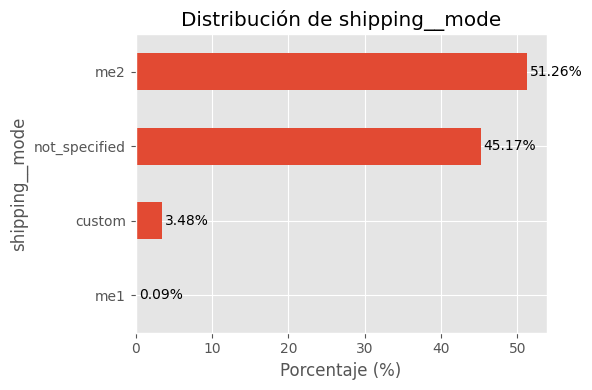

In [24]:
plot_categorical_dist(df=df, column="shipping__mode", figsize=(6, 4))

- La mitad de las publicaciones tienen shipping mode `me2`

### Numericas

#### Enteros

In [25]:
print(f"Numero de vendedores: {df['seller_id'].nunique():,}")

Numero de vendedores: 35,915


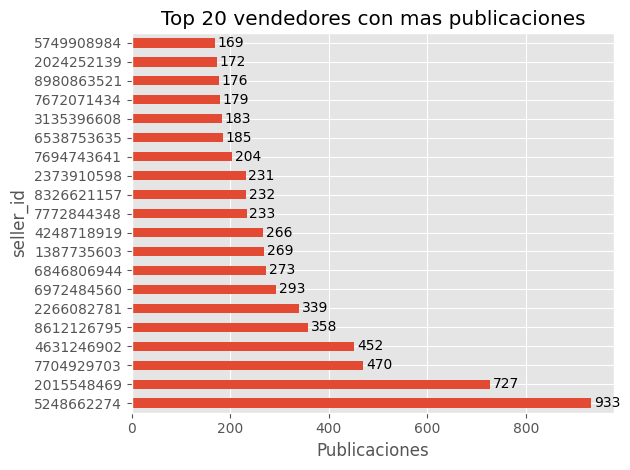

In [26]:
ax = (
    df["seller_id"]
    .value_counts()
    .nlargest(20)
    .round(2)
    .plot(kind="barh", title="Top 20 vendedores con mas publicaciones", xlabel="Publicaciones")
)

for container in ax.containers:
    ax.bar_label(container, label_type="edge", padding=2)

plt.tight_layout()
plt.show()

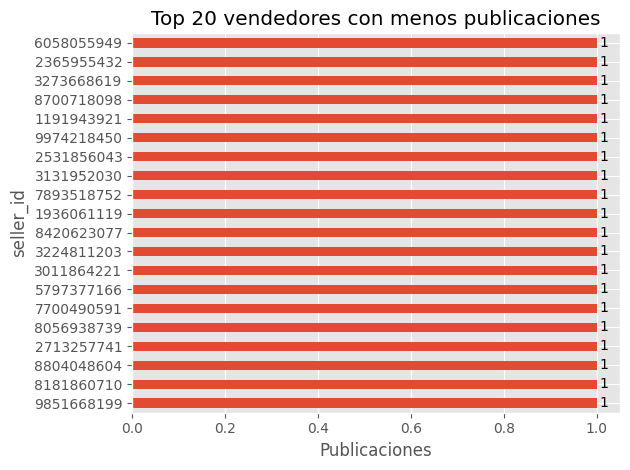

In [27]:
ax = (
    df["seller_id"]
    .value_counts()
    .nsmallest(20)
    .round(2)
    .plot(kind="barh", title="Top 20 vendedores con menos publicaciones", xlabel="Publicaciones")
)

for container in ax.containers:
    ax.bar_label(container, label_type="edge", padding=2)

plt.tight_layout()
plt.show()

count    100000.000000
mean         35.093370
std         421.076196
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        9999.000000
Name: initial_quantity, dtype: float64

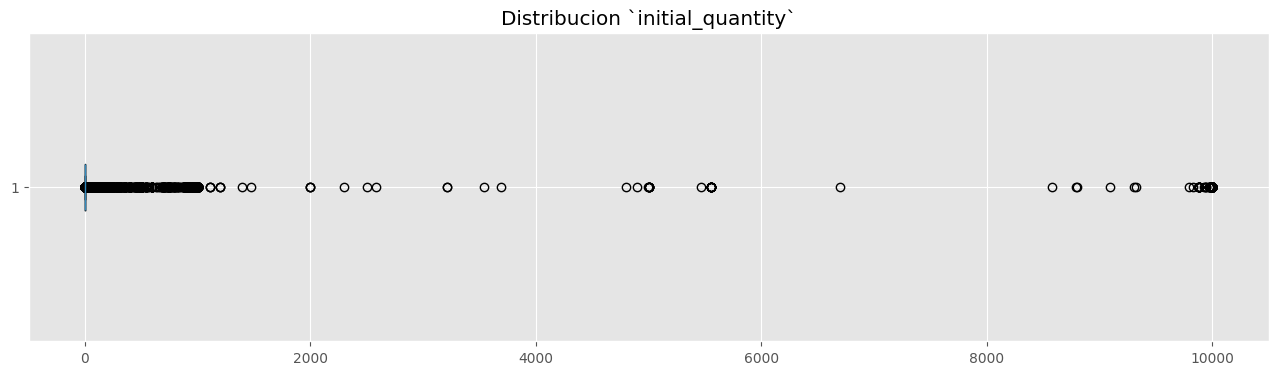

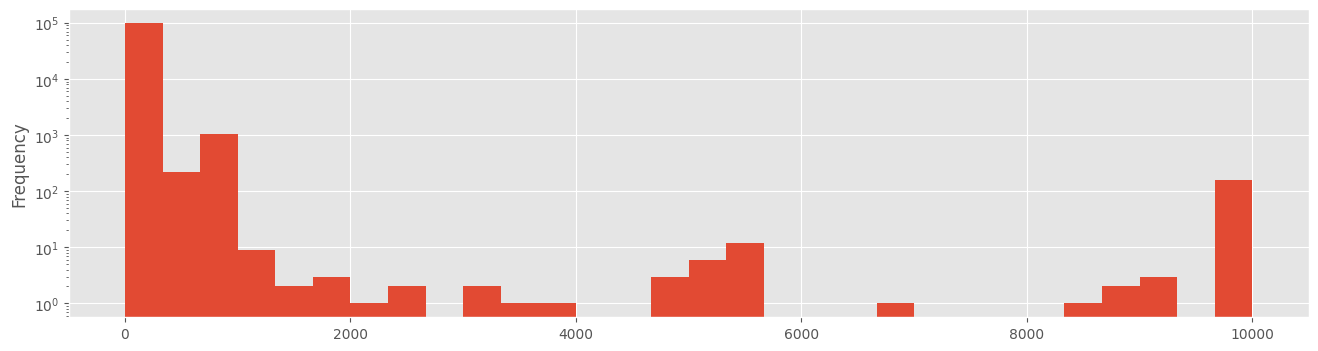

In [28]:
display(df["initial_quantity"].describe())
plt.figure(figsize=(16, 4))
plt.boxplot(x=df["initial_quantity"], vert=False)
plt.title("Distribucion `initial_quantity`")
plt.show()

plt.figure(figsize=(16, 4))
df["initial_quantity"].plot(kind="hist", logy=True, bins=30)
plt.show()

count    100000.000000
mean          2.396990
std          42.685077
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        8676.000000
Name: sold_quantity, dtype: float64

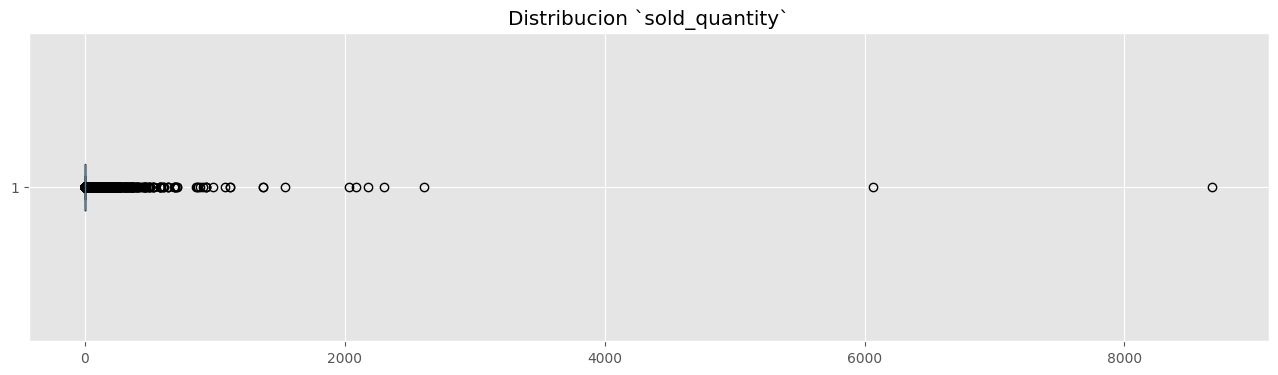

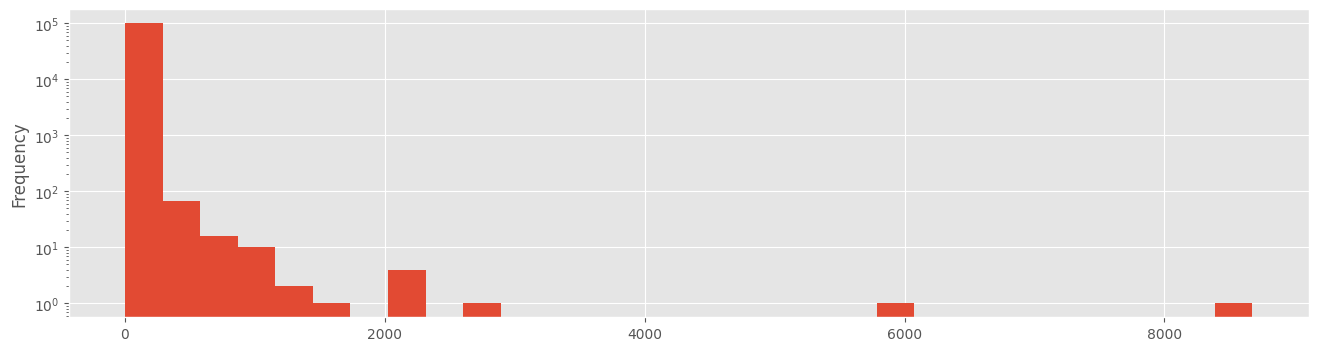

In [29]:
display(df["sold_quantity"].describe())
plt.figure(figsize=(16, 4))
plt.boxplot(x=df["sold_quantity"], vert=False)
plt.title("Distribucion `sold_quantity`")
plt.show()

plt.figure(figsize=(16, 4))
df["sold_quantity"].plot(kind="hist", logy=True, bins=30)
plt.show()

count    100000.000000
mean         34.842380
std         420.808403
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        9999.000000
Name: available_quantity, dtype: float64

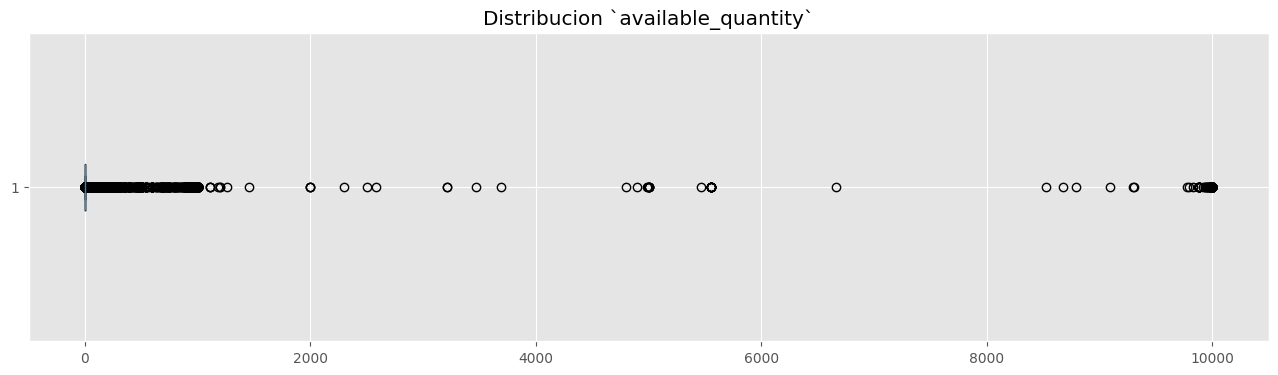

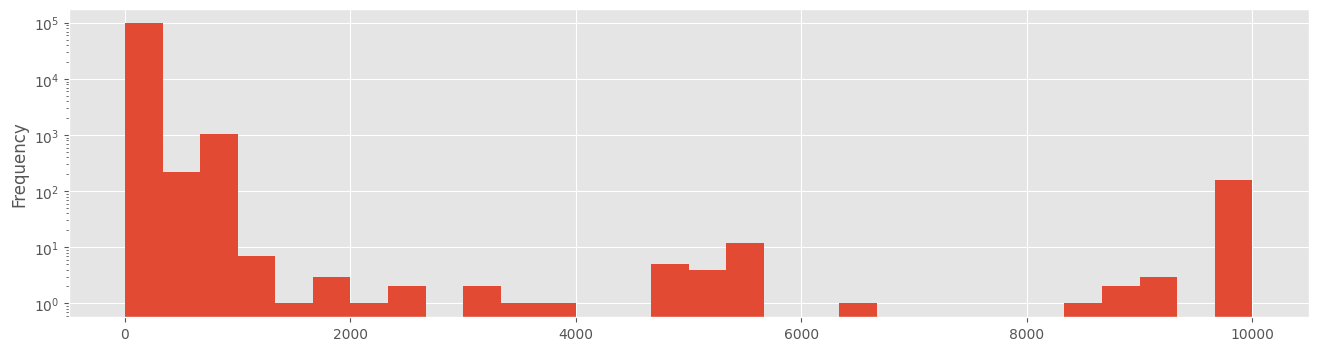

In [30]:
display(df["available_quantity"].describe())
plt.figure(figsize=(16, 4))
plt.boxplot(x=df["available_quantity"], vert=False)
plt.title("Distribucion `available_quantity`")
plt.show()

plt.figure(figsize=(16, 4))
df["available_quantity"].plot(kind="hist", logy=True, bins=30)
plt.show()

count    100000.000000
mean          2.931360
std           2.102825
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          36.000000
Name: n_pictures, dtype: float64

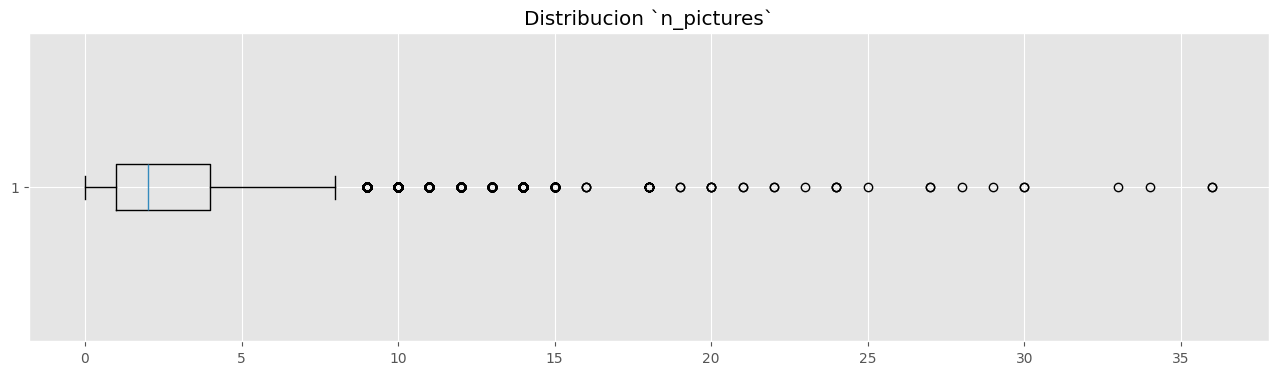

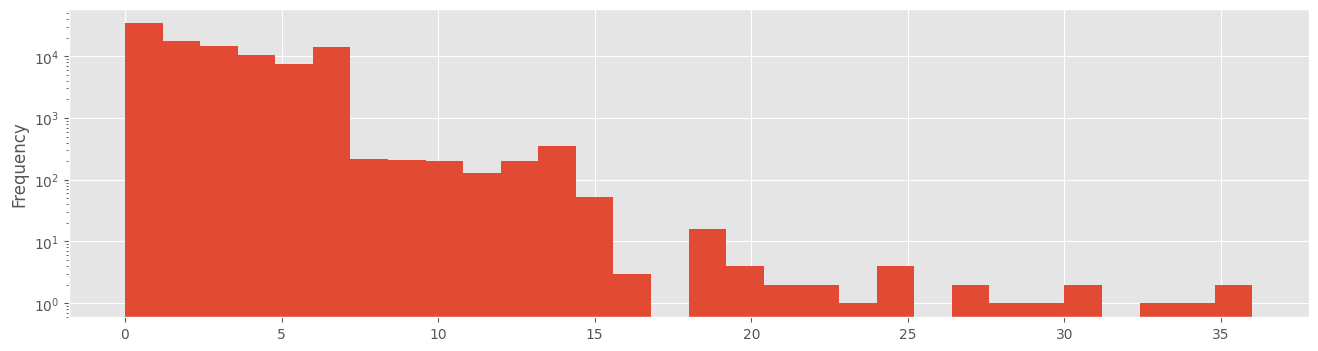

In [31]:
display(df["n_pictures"].describe())
plt.figure(figsize=(16, 4))
plt.boxplot(x=df["n_pictures"], vert=False)
plt.title("Distribucion `n_pictures`")
plt.show()

plt.figure(figsize=(16, 4))
df["n_pictures"].plot(kind="hist", logy=True, bins=30)
plt.show()

- Parecen existir outliers en la variable `initial_quantity`, `available_quantity`, `sold_quantity` y `n_pictures`. Todas tienen una distribucion sesgada hacia la derecha.

#### Floats

count    1.000000e+05
mean     5.252423e+04
std      8.623127e+06
min      8.400000e-01
25%      9.000000e+01
50%      2.500000e+02
75%      8.000000e+02
max      2.222222e+09
Name: base_price, dtype: float64

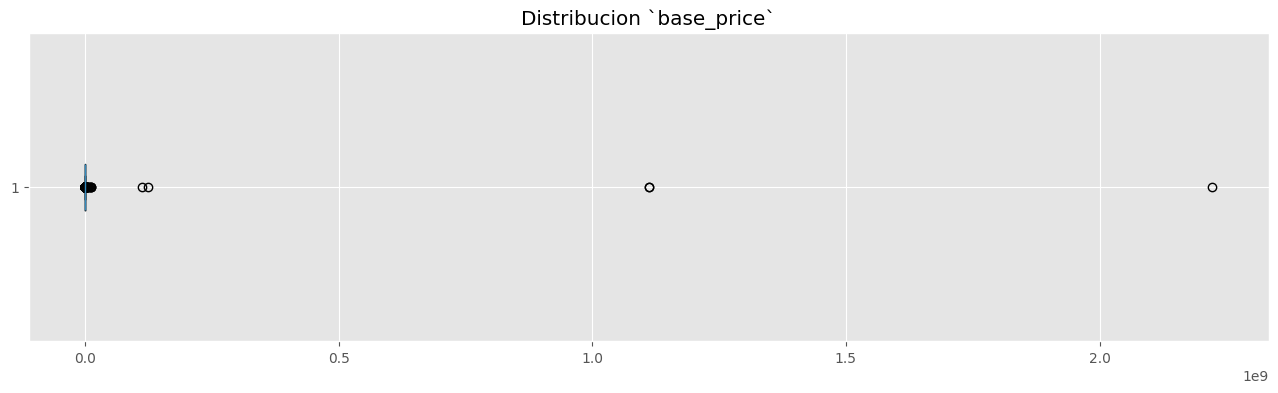

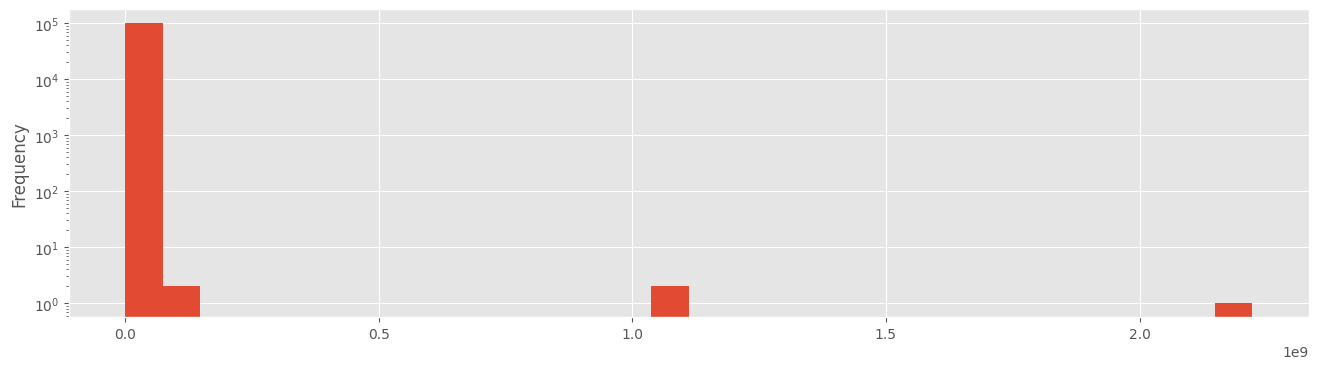

In [32]:
display(df["base_price"].describe())
plt.figure(figsize=(16, 4))
plt.boxplot(x=df["base_price"], vert=False)
plt.title("Distribucion `base_price`")
plt.show()

plt.figure(figsize=(16, 4))
df["base_price"].plot(kind="hist", logy=True, bins=30)
plt.show()

count    1.000000e+05
mean     5.252433e+04
std      8.623127e+06
min      8.400000e-01
25%      9.000000e+01
50%      2.500000e+02
75%      8.000000e+02
max      2.222222e+09
Name: price, dtype: float64

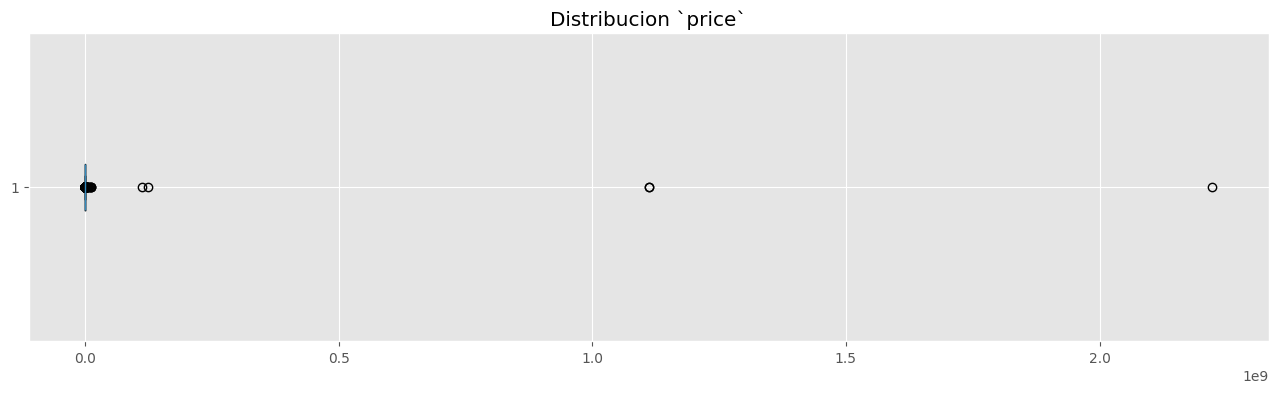

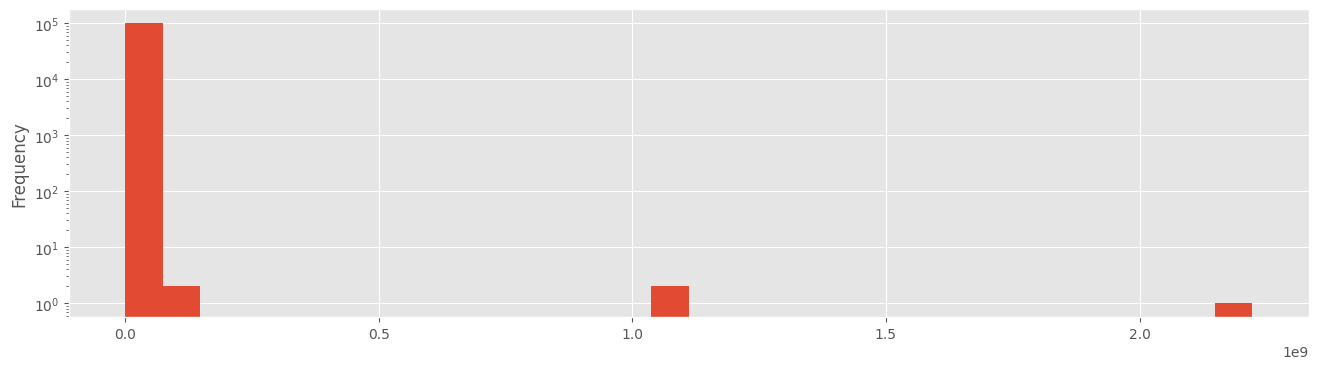

In [33]:
display(df["price"].describe())
plt.figure(figsize=(16, 4))
plt.boxplot(x=df["price"], vert=False)
plt.title("Distribucion `price`")
plt.show()

plt.figure(figsize=(16, 4))
df["price"].plot(kind="hist", logy=True, bins=30)
plt.show()

count      143.000000
mean      1593.341958
std       2245.798072
min        120.000000
25%        449.000000
50%        858.000000
75%       1500.000000
max      13999.000000
Name: original_price, dtype: float64

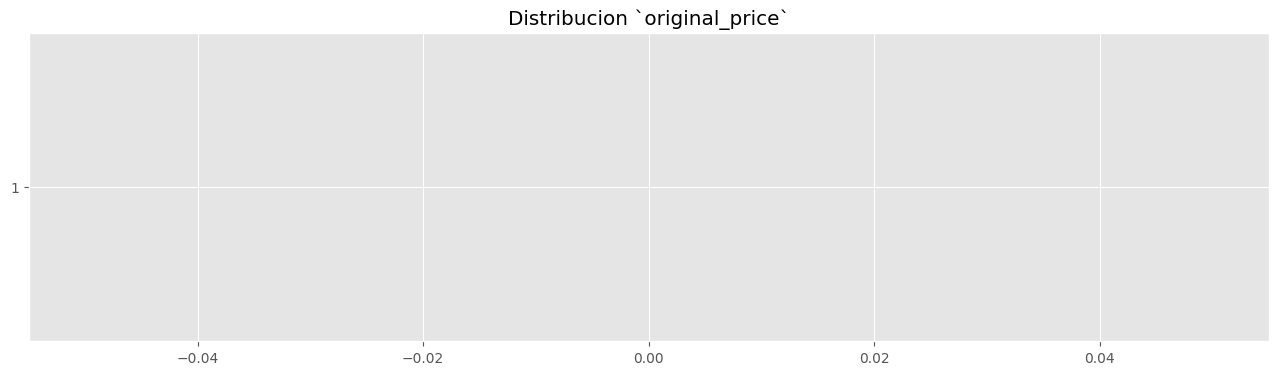

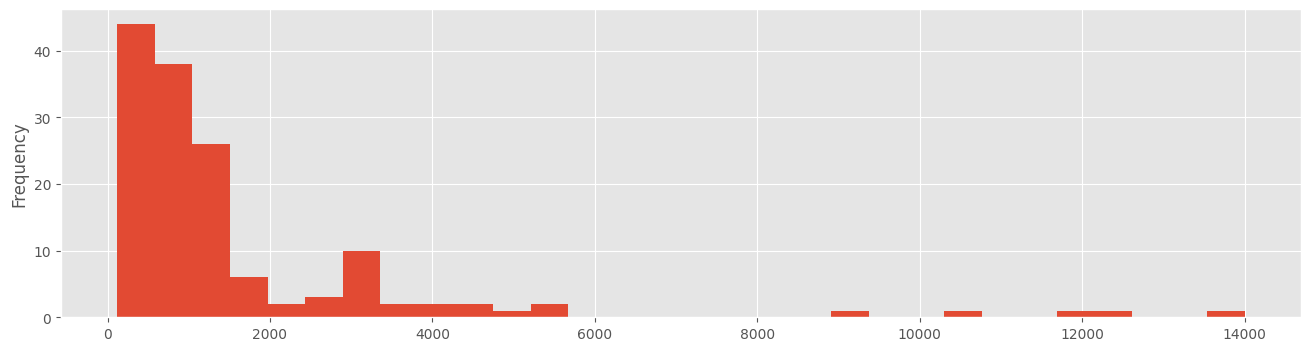

In [34]:
display(df["original_price"].describe())
plt.figure(figsize=(16, 4))
plt.boxplot(x=df["original_price"], vert=False)
plt.title("Distribucion `original_price`")
plt.show()

plt.figure(figsize=(16, 4))
df["original_price"].plot(kind="hist", logy=False, bins=30)
plt.show()

In [35]:
print(f"Numero de tiendas oficiales: {df['official_store_id'].nunique():,}")

Numero de tiendas oficiales: 198


In [36]:
print(f"Numero de catalogos de productos: {df['catalog_product_id'].nunique():,}")

Numero de catalogos de productos: 9


### Strings

MIRA MIS CALIFICACIONES
Mis calificaciones y trayectoria dan garantía
SI
Defectos de impresion
OFICIAL DE APPLE
Sin garantía
PRODUCTOS NUEVOS
3 Meses, por defectos en la fabricación, en nuestro Taller.
Sin garantía
Con Garantía Oficial


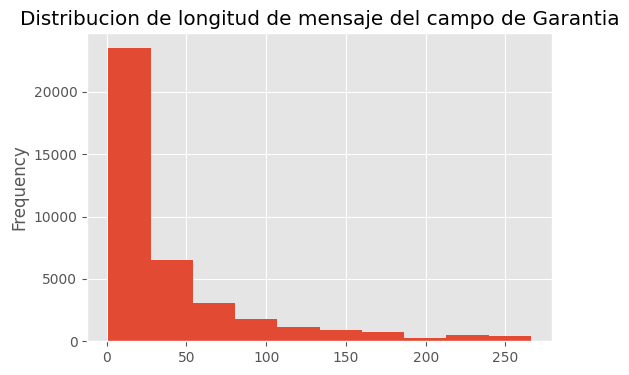

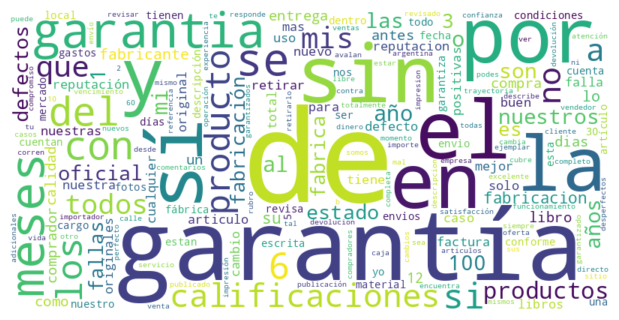

In [37]:
print("\n".join(df["warranty"].dropna().sample(10).tolist()))

plt.figure(figsize=(6, 4))
df["warranty"].str.len().plot(kind="hist", title="Distribucion de longitud de mensaje del campo de Garantia")
plt.show()

create_wordcloud(df, "warranty")
plt.show()

- La variable de `Garantia` contiene lenguaje natural, y no se cumple la condicion de que si hay mensaje hay garantia. Hay casos donde el mensaje es "Sin garantía", "Local a la calle", en los que no refleja una garantia valida.

MOSH6
MOSH6
ABQ1I
MOSH6
MOSH6
UQU1U
JXLIQ
WGPLA
WGPLA
MOSH6


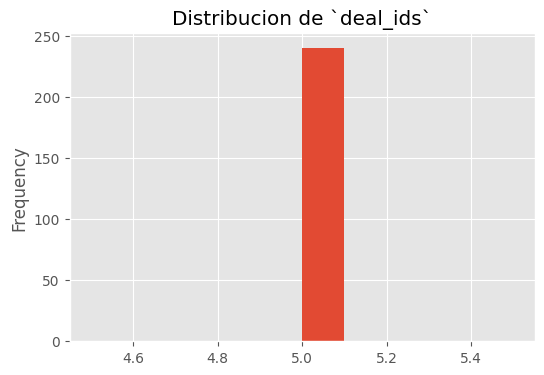

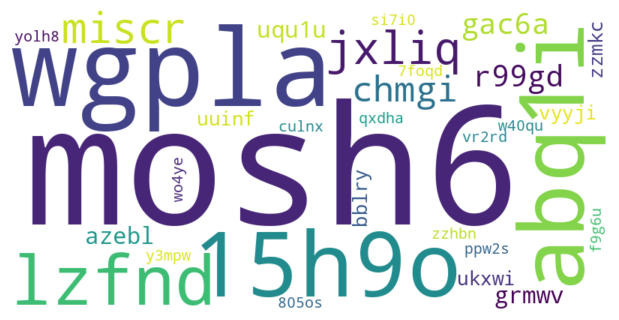

In [38]:
print("\n".join(df["deal_ids"].dropna().sample(10).tolist()))

plt.figure(figsize=(6, 4))
df["deal_ids"].str.len().plot(kind="hist", title="Distribucion de `deal_ids`")
plt.show()

create_wordcloud(df, "deal_ids")
plt.show()

- En `deal_ids` todos son indicadores unicos de 5 caracteres. Sin embargo, no es claro a que hace referencia esta variable.

MLA6808862326
MLA1254192041
MLA4998769582
MLA5835997720
MLA9651909555
MLA2421988432
MLA1744775853
MLA1364282601
MLA4610545724
MLA7522980698


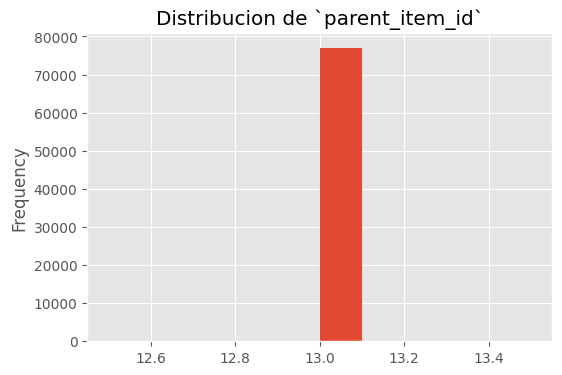

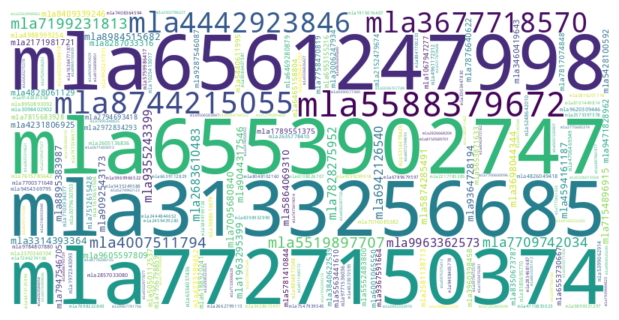

In [39]:
print("\n".join(df["parent_item_id"].dropna().sample(10).tolist()))

plt.figure(figsize=(6, 4))
df["parent_item_id"].str.len().plot(kind="hist", title="Distribucion de `parent_item_id`")
plt.show()

create_wordcloud(df, "parent_item_id")
plt.show()

- En `parent_item_id` todos son indicadores unicos de 13 caracteres que empienzan por "MLA" -> Mercado Libre Argentina

MLA7985
MLA1227
MLA373391
MLA89995
MLA7111
MLA66226
MLA26536
MLA41057
MLA1227
MLA1227


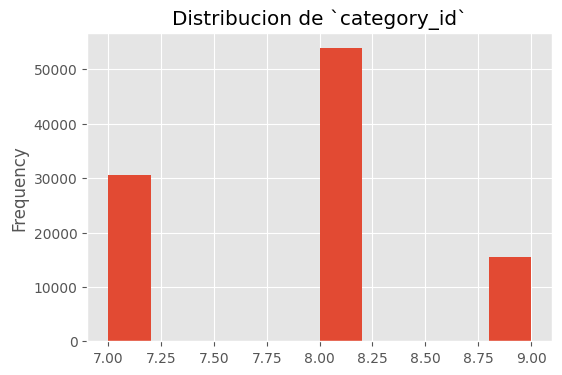

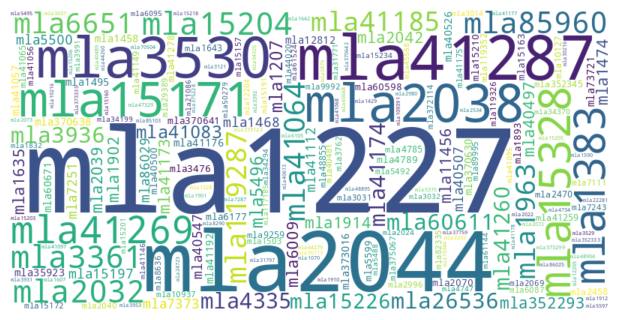

In [40]:
print("\n".join(df["category_id"].dropna().sample(10).tolist()))

plt.figure(figsize=(6, 4))
df["category_id"].str.len().plot(kind="hist", title="Distribucion de `category_id`")
plt.show()

create_wordcloud(df, "category_id")
plt.show()

- En `category_id` todos son indicadores unicos de 7,8 o 9 caracteres que empienzan por "MLA"

MLA8059442015-942853995
MLA3843159455-930238044
MLA3983559660-932543902
MLA8117256248-917430587
MLA4866446146-899643388
MLA7845871599-921986001
MLA4226385699-939077450
MLA3160537499-918549805
MLA4814607461-942223082
MLA8964736272-896911488


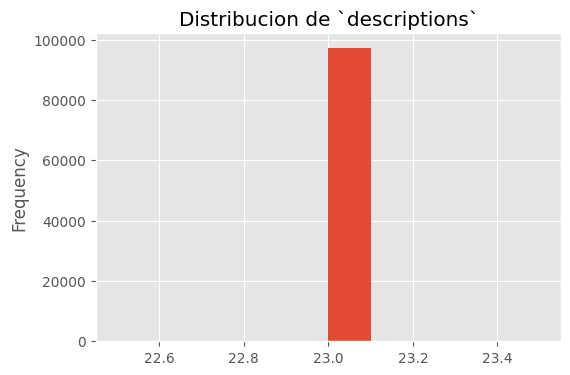

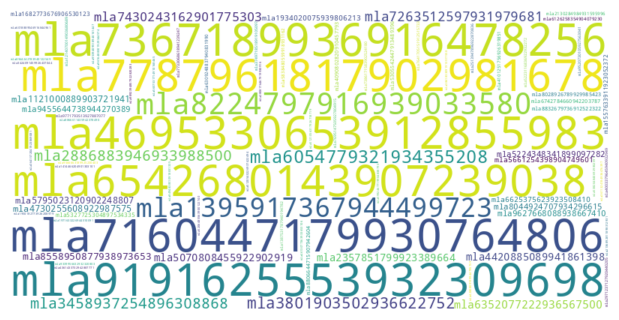

In [41]:
print("\n".join(df["descriptions"].dropna().sample(10).tolist()))

plt.figure(figsize=(6, 4))
df["descriptions"].str.len().plot(kind="hist", title="Distribucion de `descriptions`")
plt.show()

create_wordcloud(df, "descriptions")
plt.show()

- En `descriptions` todos son indicadores unicos de 23 caracteres que empienzan por "MLA"

In [42]:
print(f"Numero de ids diferentes {df['id'].nunique():,}")

Numero de ids diferentes 100,000


`id` es el identificador unico de cada fila en el dataset.

In [43]:
for each in ["thumbnail", "secure_thumbnail", "permalink", "video_id"]:
    print(each.capitalize())
    print("Sample: ")
    print(df[each].dropna().sample(10).tolist(), end="\n\n")

Thumbnail
Sample: 
['http://mla-s1-p.mlstatic.com/21557-MLA8876301256_122014-I.jpg', 'http://mla-s1-p.mlstatic.com/722501-MLA2282818274_072015-I.jpg', 'http://mla-s2-p.mlstatic.com/4136-MLA2525288298_7912-I.jpg', 'http://mla-s2-p.mlstatic.com/735701-MLA6844219439_082015-I.jpg', 'http://mla-s2-p.mlstatic.com/186501-MLA6864794889_072015-I.jpg', 'http://mla-s1-p.mlstatic.com/395301-MLA6857234196_062015-I.jpg', 'http://mla-s1-p.mlstatic.com/21622-MLA3945795711_122014-I.jpg', 'http://mla-s2-p.mlstatic.com/4956-MLA4995110217_032013-I.jpg', 'http://mla-s2-p.mlstatic.com/995101-MLA5363467838_032015-I.jpg', 'http://mla-s1-p.mlstatic.com/713201-MLA7552124857_052015-I.jpg']

Secure_thumbnail
Sample: 
['https://a248.e.akamai.net/mla-s1-p.mlstatic.com/4121-MLA2237680658_052012-I.jpg', 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/18735-MLA2659333510_092014-I.jpg', 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/18447-MLA3893860428_082014-I.jpg', 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/

- Para las columnas ``thumbnail``, ``secure_thumbnail`` y ``permalink``, los links parecen no funcionar, por ende se descartaran del analisis. Por otro lado `video_id` parece ser un identificador unico de las publicaciones que tienen video disponible.

Bocas Del Tiempo - Eduardo Galeano - Ed. Siglo Xxi
Notebook Toshiba Satellite A300d
Llave De Ignicion Para Arranque Para Renault 12
Samsung Led 65 Js 9000 65js9000 Ultra Hd 4k 3d Linea Nueva!!
Frank Sinatra - Duets Cd Original Uk Volumen 2
Nokia 710 Urg
Historia De España - Joseph Pérez - Editorial Crítica
Artesonido: Los Cantores De Alba Lp Ternura Argentina Disco
Ron Cocobongo (malibú Nacional) - Envio Por U. Sin Cargo!!!
La Sociologia Alemana Contemporanea


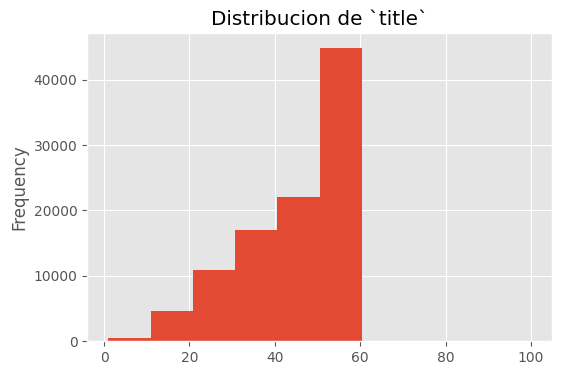

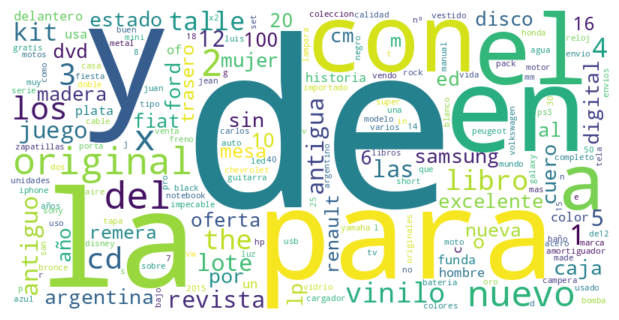

In [44]:
print("\n".join(df["title"].dropna().sample(10).tolist()))

plt.figure(figsize=(6, 4))
df["title"].str.len().plot(kind="hist", title="Distribucion de `title`")
plt.show()

create_wordcloud(df, "title")
plt.show()

- La variable de `title` contiene lenguaje natural que describe el producto, tiene entre 0 y 60 caracteres. 

### Fechas

In [45]:
df["date_created"].describe()

count                                 100000
mean     2015-09-16 05:37:30.126649856+00:00
min                2013-05-21 04:22:35+00:00
25%      2015-09-01 21:00:31.750000128+00:00
50%         2015-09-17 20:31:53.500000+00:00
75%                2015-10-02 15:29:44+00:00
max                2015-10-15 09:14:30+00:00
Name: date_created, dtype: object

- Publicaciones creadas entre Mayo del 2013 y Octubre del 2015.

In [46]:
df["last_updated"].describe()

count                                 100000
mean     2015-09-23 12:22:31.871019520+00:00
min                2014-11-11 20:15:04+00:00
25%         2015-09-11 12:08:26.500000+00:00
50%                2015-09-27 03:01:21+00:00
75%      2015-10-07 18:08:51.750000128+00:00
max         2015-10-15 10:48:48.026000+00:00
Name: last_updated, dtype: object

In [47]:
df["stop_time"].describe()

count                           100000
mean     2015-11-16 03:53:10.695500032
min                2015-10-14 11:51:37
25%                2015-10-31 17:11:45
50%         2015-11-16 02:12:30.500000
75%      2015-12-01 00:45:32.249999872
max                2024-11-04 14:55:51
Name: stop_time, dtype: object

In [48]:
df["start_time"].describe()

count                           100000
mean     2015-09-16 05:48:30.129960192
min                2013-05-21 04:22:35
25%                2015-09-01 21:04:33
50%                2015-09-17 20:35:36
75%      2015-10-02 15:34:33.750000128
max                2015-10-15 09:14:30
Name: start_time, dtype: object

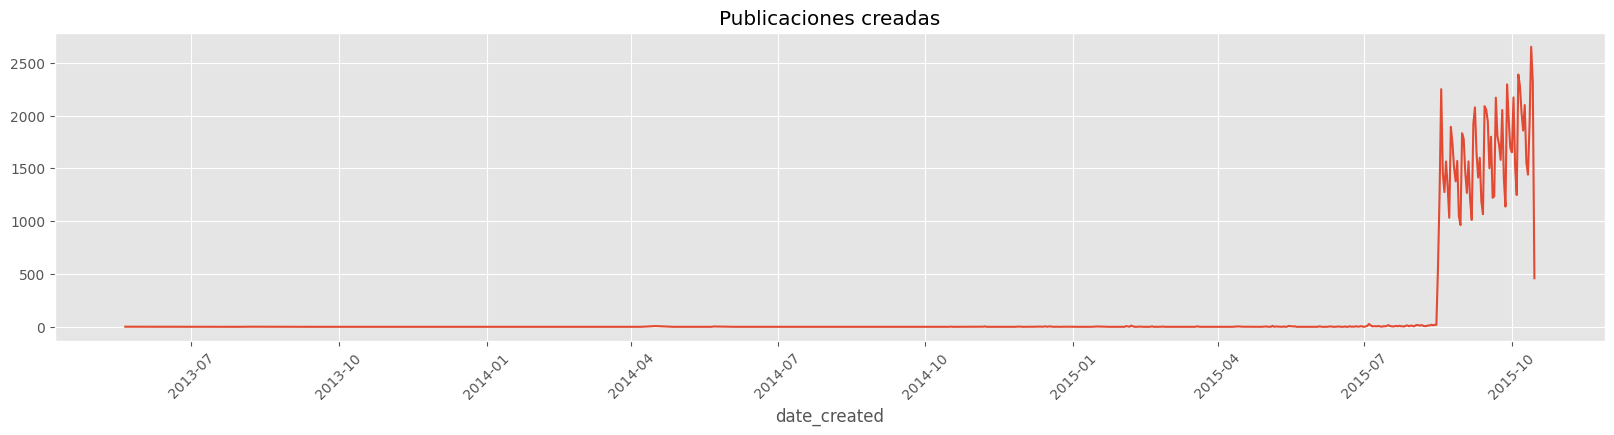

In [49]:
df["date_created"].dt.date.value_counts().sort_index().plot(kind="line", figsize=(20, 4))
plt.title("Publicaciones creadas")
plt.xticks(rotation=45)
plt.show()

## Analisis Multivariado

<Axes: xlabel='price'>

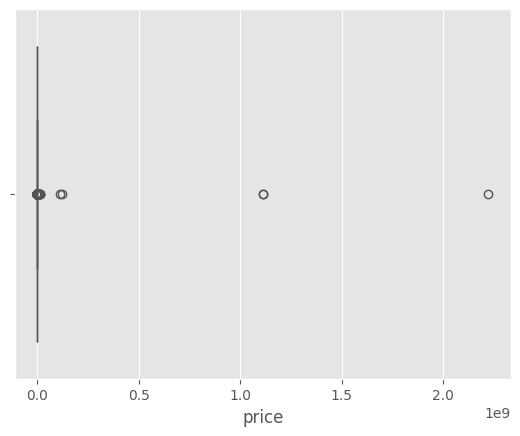

In [50]:
sns.boxplot(data=df, x="price")